Voltron_Cell1: TIFF shape (11957, 184, 184)


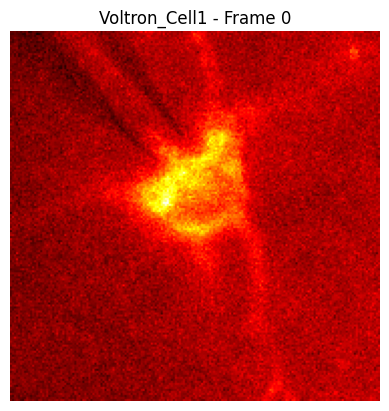

Voltron_Cell2: TIFF shape (11957, 184, 184)


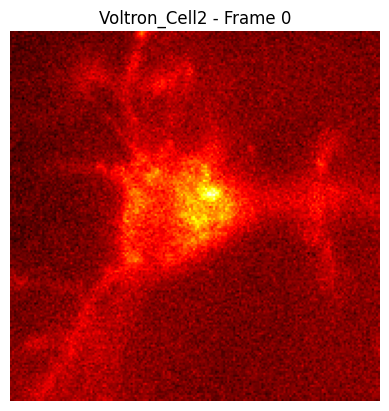

Voltron_Cell3: TIFF shape (19927, 184, 184)


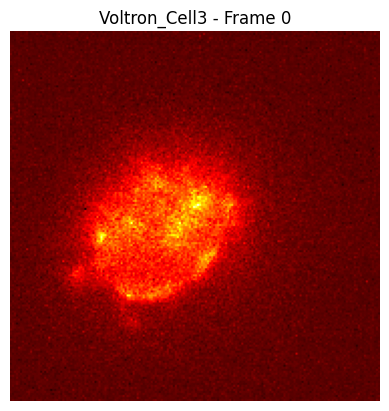

Voltron_Cell3_2: TIFF shape (19927, 184, 184)


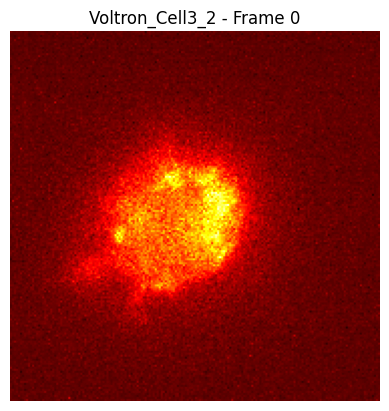

Voltron_Cell4: TIFF shape (19927, 184, 400)


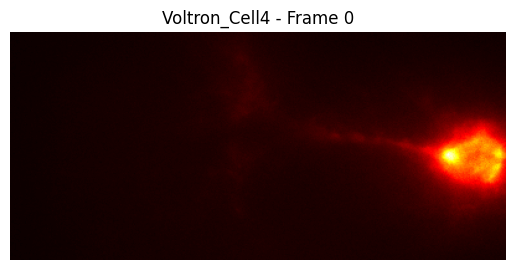

In [ ]:
import os
import tifffile
import matplotlib.pyplot as plt
import numpy as np
# Path to your dataset
base_path = "E:\\Voltron2_part1"

# Get list of cell folders
cell_folders = [f for f in os.listdir(base_path) if f.startswith("Voltron_Cell")]

for cell in cell_folders:
    cell_path = os.path.join(base_path, cell)
    
    # Find the .dat file (which is actually a .tif)
    tif_file = next((f for f in os.listdir(cell_path) if f.endswith(".tif")), None)
    if tif_file is None:
        print(f"No .dat file found in {cell_path}")
        continue
    
    tif_path = os.path.join(cell_path, tif_file)
    
    # Read TIFF file
    vol_data = tifffile.imread(tif_path)  # shape: (T, H, W) or (H, W)

    print(f"{cell}: TIFF shape {vol_data.shape}")

    # Show a single frame or mean projection
    if vol_data.ndim == 3:
        plt.imshow(vol_data[0], cmap='hot')  # first frame
        plt.title(f'{cell} - Frame 0')
    else:
        plt.imshow(vol_data, cmap='hot')
        plt.title(f'{cell} - Static Image')
    
    plt.axis('off')
    plt.show()

TIFF shape (11957, 184, 184)


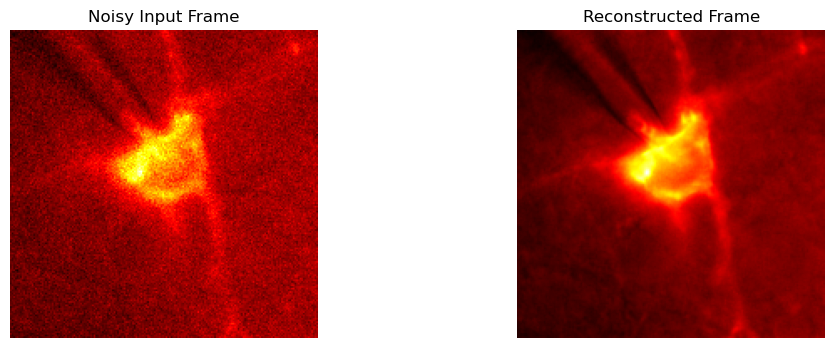

In [2]:
import os
import tifffile
import matplotlib.pyplot as plt
import numpy as np
# Path to your dataset
base_path = "E:\\Voltron2_part1\\Voltron_Cell1\\SUPPORT\\20250609_222051"

base_path_noisy = "E:\\Voltron2_part1\\Voltron_Cell1"

# Get list of cell folders
# cell_folders = [f for f in os.listdir(base_path) if f.startswith("Voltron_Cell")]

# for cell in cell_folders:
#     cell_path = os.path.join(base_path, cell)
    
# Find the .dat file (which is actually a .tif)
tif_file = next((f for f in os.listdir(base_path) if f.endswith(".tif")), None)

tif_file_noisy = next((f for f in os.listdir(base_path_noisy) if f.endswith(".tif")), None)


# if tif_file is None:
#     print(f"No .tif file found in {cell_path}")

tif_path = os.path.join(base_path, tif_file)
tif_path_noisy = os.path.join(base_path_noisy, tif_file_noisy)

# Read TIFF file
vol_data = tifffile.imread(tif_path)  # shape: (T, H, W) or (H, W)
vol_data_noisy = tifffile.imread(tif_path_noisy)  # shape: (T, H, W) or (H, W)

print(f"TIFF shape {vol_data.shape}")

# Show a single frame or mean projection
if vol_data.ndim == 3:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].imshow(vol_data_noisy[100], cmap='hot')
    axs[0].set_title('Noisy Input Frame')
    axs[0].axis('off')

    axs[1].imshow(vol_data[100], cmap='hot')
    axs[1].set_title('Reconstructed Frame')
    axs[1].axis('off')
else:
    plt.imshow(vol_data, cmap='hot')
    plt.title(f'Static Image')

plt.axis('off')
plt.show()

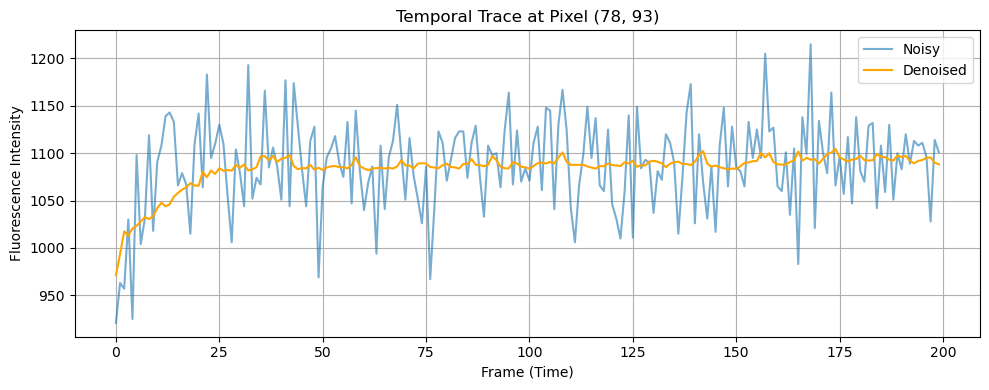

In [3]:
x, y = 78, 93
vol_trace = vol_data[0:200,x, y]  # Extract the trace at (x, y)
vol_trace_noisy = vol_data_noisy[0:200,x, y]  # Extract the trace at (x, y)

plt.figure(figsize=(10, 4))
plt.plot(vol_trace_noisy, label='Noisy', alpha=0.6)
plt.plot(vol_trace, label='Denoised', color='orange')
plt.xlabel('Frame (Time)')
plt.ylabel('Fluorescence Intensity')
plt.title(f"Temporal Trace at Pixel ({x}, {y})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
import tifffile

base_path_noisy = "E:\\Voltron2_part1\\Voltron_Cell1"

tif_file_noisy = next((f for f in os.listdir(base_path_noisy) if f.endswith(".tif")), None)

tif_path_noisy = os.path.join(base_path_noisy, tif_file_noisy)

# Read TIFF file
vol_data_noisy = tifffile.imread(tif_path_noisy)  # shape: (T, H, W) or (H, W)

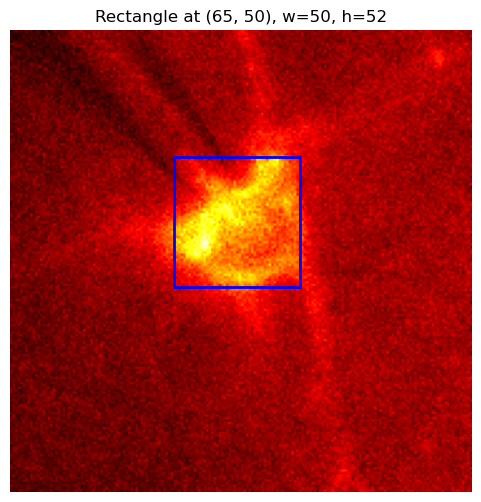

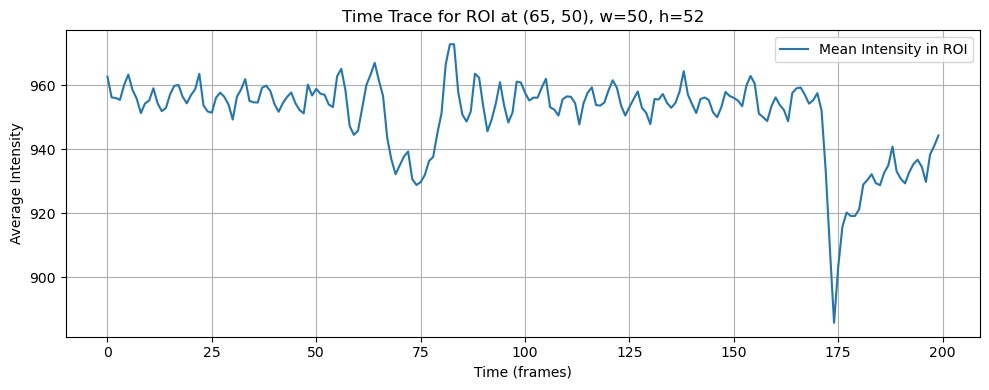

In [3]:
# Parameters for the rectangle
x, y = 65, 50      # top-left corner (column, row)
width, height = 50, 52

# Plotting function
def plot_frame_with_rectangle(frame, x, y, width, height):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(frame, cmap='hot')
    
    # Add rectangle patch
    rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)

    ax.set_title(f"Rectangle at ({x}, {y}), w={width}, h={height}")
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Call the function
plot_frame_with_rectangle(vol_data_noisy[100], x, y, width, height)


# Extract the patch over time (shape: T x height x width)
patch = vol_data_noisy[800:1000, y:y+height, x:x+width]  # shape: (T, h, w)

# Average over spatial dimensions
avg_trace = patch.mean(axis=(1, 2))  # shape: (T,)

# Plot the time trace
plt.figure(figsize=(10, 4))
plt.plot(avg_trace, label='Mean Intensity in ROI')
plt.xlabel("Time (frames)")
plt.ylabel("Average Intensity")
plt.title(f"Time Trace for ROI at ({x}, {y}), w={width}, h={height}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
from ipywidgets import interact, IntSlider

def interactive_plot(x=30, y=40, width=20, height=15):
    plot_frame_with_rectangle(frame, x, y, width, height)


frame = vol_data_noisy[100]

interact(interactive_plot,
         x=IntSlider(min=0, max=frame.shape[1]-1, step=1, value=30),
         y=IntSlider(min=0, max=frame.shape[0]-1, step=1, value=40),
         width=IntSlider(min=1, max=frame.shape[1], step=1, value=20),
         height=IntSlider(min=1, max=frame.shape[0], step=1, value=15));



interactive(children=(IntSlider(value=30, description='x', max=183), IntSlider(value=40, description='y', max=…